# Day_078

### 練習時間
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

確認硬體資源

!nvidia-smi

In [1]:
import os
import keras
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.models import Model, Sequential

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = (((x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))) - 1) * 2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train.shape

(50000, 3072)

In [7]:
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(input_layer)
        else:
            x = Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i+1))(x)
    
    out = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [9]:
# 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs = EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data = (x_test, y_test), 
          shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 36s 725us/step - loss: 2.0741 - acc: 0.2347 - val_loss: 1.9158 - val_acc: 0.2889
Epoch 2/100
50000/50000 [==============================] - 35s 695us/step - loss: 1.8195 - acc: 0.3416 - val_loss: 1.7399 - val_acc: 0.3769
Epoch 3/100
50000/50000 [==============================] - 35s 699us/step - loss: 1.7105 - acc: 0.3855 - val_loss: 1.6635 - val_acc: 0.4007
Epoch 4/100
50000/50000 [==============================] - 35s 697us/step - loss: 1.6695 - acc: 0.4034 - val_loss: 1.6161 - val_acc: 0.4158
Epoch 5/100
50000/50000 [==============================] - 34s 687us/step - loss: 1.6033 - acc: 0.4279 - val_loss: 1.5935 - val_acc: 0.4251
Epoch 6/100
50000/50000 [==============================] - 33s 655us/step - loss: 1.5674 - acc: 0.4396 - val_loss: 1.5792 - val_acc: 0.4340
Epoch 7/100
50000/50000 [==============================] - 33s 654us/step - loss: 1.5340 - acc: 0.4548 - val_l

Epoch 59/100
50000/50000 [==============================] - 33s 660us/step - loss: 0.7429 - acc: 0.7338 - val_loss: 1.8247 - val_acc: 0.5089
Epoch 60/100
50000/50000 [==============================] - 30s 595us/step - loss: 0.7223 - acc: 0.7404 - val_loss: 1.8091 - val_acc: 0.5009
Epoch 61/100
50000/50000 [==============================] - 34s 676us/step - loss: 0.7186 - acc: 0.7434 - val_loss: 1.8647 - val_acc: 0.5017
Epoch 62/100
50000/50000 [==============================] - 34s 674us/step - loss: 0.7090 - acc: 0.7466 - val_loss: 1.8722 - val_acc: 0.5029
Epoch 63/100
50000/50000 [==============================] - 34s 672us/step - loss: 0.7093 - acc: 0.7460 - val_loss: 1.8601 - val_acc: 0.5029
Epoch 64/100
50000/50000 [==============================] - 34s 677us/step - loss: 0.6954 - acc: 0.7499 - val_loss: 1.8456 - val_acc: 0.5031
Epoch 65/100
50000/50000 [==============================] - 33s 669us/step - loss: 0.6796 - acc: 0.7561 - val_loss: 1.9534 - val_acc: 0.5038
Epoch 66/100


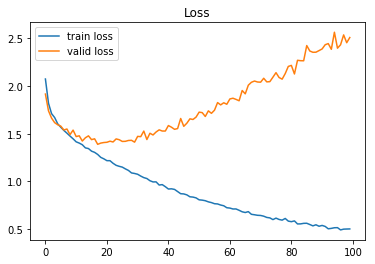

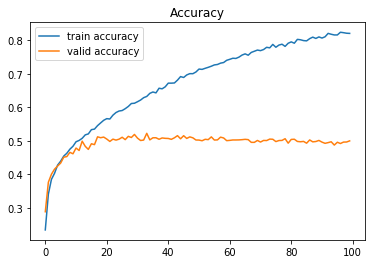

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()